# Problem 2

## Problem Description
In this problem you will train a neural network to classify points with features $x_0$ and $x_1$ belonging to one of three classes, indicated by the label $y$. The structure of your neural network is up to you, but you must describe the structure of your network, training parameters, and report an accuracy for your fitted model on the provided data.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

- Visualization of provided data
- Visualization of trained model with provided data
- Trained model accuracy
- Discussion of model structure and training parameters

#### Imports and Utility Functions:

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from torch import optim


def dataGen():
    # random_state = 0 set so generated samples are identical
    x, y = datasets.make_blobs(n_samples = 100, n_features = 2, centers = 3, random_state = 0)
    return x, y

def visualizeModel(model):
    # Get data
    x, y = dataGen()
    # Number of data points in meshgrid
    n = 100
    # Set up evaluation grid
    x0 = torch.linspace(min(x[:,0]), max(x[:,0]),n)
    x1 = torch.linspace(min(x[:,1]), max(x[:,1]),n)
    X0, X1 = torch.meshgrid(x0, x1, indexing = 'ij')
    Xgrid = torch.vstack((X0.flatten(),X1.flatten())).T
    Ypred = torch.argmax(model(Xgrid), dim = 1)
    # Plot data
    plt.scatter(x[:,0], x[:,1], c = y, cmap = ListedColormap(['red','blue','magenta']))
    # Plot model
    plt.contourf(Xgrid[:,0].reshape(n,n), Xgrid[:,1].reshape(n,n), Ypred.reshape(n,n), cmap = ListedColormap(['red', 'blue', 'magenta']), alpha = 0.15)
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    plt.show()

## Generate and visualize the data
Use the `dataGen()` function to generate the x and y data, then visualize with a 2D scatter plot, coloring points according to their labels.

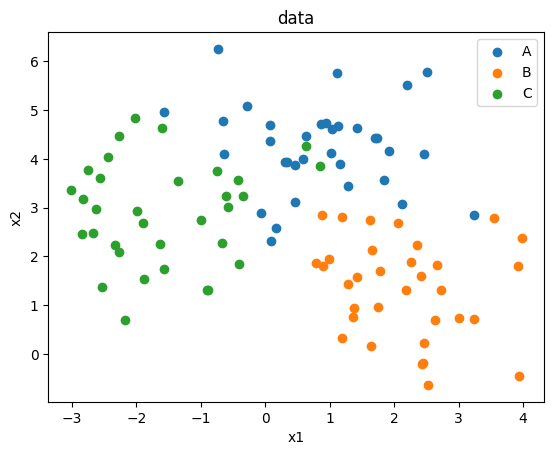

In [2]:
# YOUR CODE GOES HERE
x, y = dataGen()

fig = plt.figure()
x1 = x[:,0]
x2 = x[:,1]
classes = ['A', 'B', 'C']

for i in range(3):
    plt.scatter(x1[y == i], x2[y == i], label = classes[i])
    
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('data')
plt.legend()
plt.show()

## Create and train a neural network using PyTorch
Choice of structure and training parameters are entirely up to you, however you will need to provide reasoning for your choices. An accuracy of 0.9 or more is reasonable. 

Hint: think about the number out nodes in your output layer and choice of output layer activation function for this multi-class classification problem.

Model details: 
 neural_network(
  (linear_1): Linear(in_features=2, out_features=10, bias=True)
  (linear_2): Linear(in_features=10, out_features=10, bias=True)
  (linear_3): Linear(in_features=10, out_features=10, bias=True)
  (linear_4): Linear(in_features=10, out_features=10, bias=True)
  (linear_5): Linear(in_features=10, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)
Iteration: 0, Loss: 1.1041, Accuracy: 33.00%
Iteration: 100, Loss: 0.6375, Accuracy: 92.00%
Iteration: 200, Loss: 0.5975, Accuracy: 97.00%
Iteration: 300, Loss: 0.5738, Accuracy: 98.00%
Iteration: 400, Loss: 0.5722, Accuracy: 98.00%
Iteration: 500, Loss: 0.5718, Accuracy: 98.00%
Iteration: 600, Loss: 0.5717, Accuracy: 98.00%
Iteration: 700, Loss: 0.5716, Accuracy: 98.00%
Iteration: 800, Loss: 0.5715, Accuracy: 98.00%
Iteration: 900, Loss: 0.5715, Accuracy: 98.00%
Iteration: 1000, Loss: 0.5715, Accuracy: 98.00%
Iteration: 1100, Loss: 0.5715, Accuracy: 98.00%
Iteration: 1200, Loss: 0.5715, Accuracy: 98.00%
It

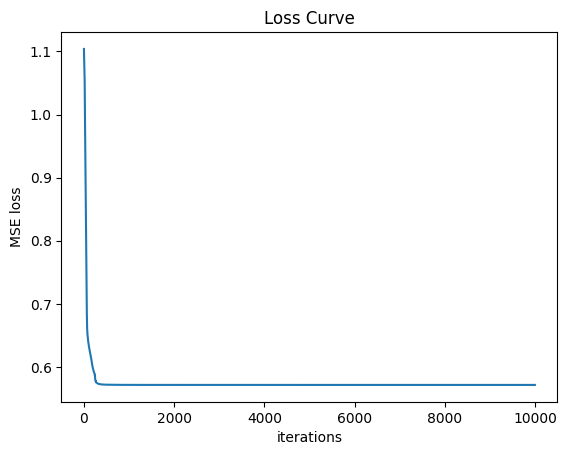

In [6]:
# YOUR CODE GOES HERE
lr = 0.005
epochs = 10000

class neural_network(nn.Module):
    def __init__(self, n_hidden = 6, n_in = 2, n_out = 3, activation = nn.functional.relu):
        super().__init__()

        self.linear_1 = nn.Linear(n_in, n_hidden)
        self.linear_2 = nn.Linear(n_hidden, n_hidden)
        self.linear_3 = nn.Linear(n_hidden, n_hidden)
        self.linear_4 = nn.Linear(n_hidden, n_hidden)
        self.linear_5 = nn.Linear(n_hidden, n_out)
        self.softmax = nn.Softmax(dim = 1)
        self.activation = activation

    def forward(self, x):
        x = self.activation(self.linear_1(x))
        x = self.activation(self.linear_2(x))
        x = self.activation(self.linear_3(x))
        x = self.activation(self.linear_4(x))
        x = self.linear_5(x)

        x = self.softmax(x)

        return x
    
model = neural_network(n_hidden = 10, n_in = 2, n_out = 3, activation = nn.functional.relu)  
opt = optim.Adam(params = model.parameters(), lr = lr)
loss_function = nn.CrossEntropyLoss()

x = torch.Tensor(x)
y = torch.Tensor(y).long()

loss_curve = []

print("Model details: \n", model)

for i in range(epochs):
    output = model(x)
    loss = loss_function(output, y)

    loss_curve.append(loss.item())
    accuracy = (torch.argmax(output, dim = 1) == y).float().mean() * 100

    if(i % 100 == 0):
        print(f"Iteration: {i}, Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.2f}%")
    
    opt.zero_grad()
    loss.backward()
    opt.step()

plt.figure()
plt.plot(loss_curve)
plt.xlabel("iterations")
plt.ylabel("MSE loss")
plt.title("Loss Curve")
plt.show()

## Visualize your trained model
Use the provided `visualizeModel()` function by passing in your trained model to see your models predicted function compared to the provided data

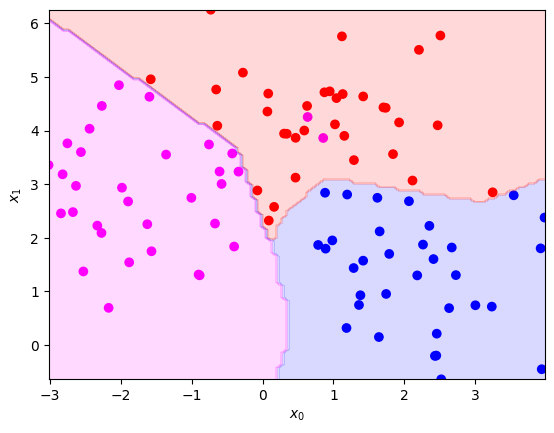

In [7]:
# YOUR CODE GOES HERE
visualizeModel(model)

## Discussion
Report the accuracy of your trained model on the generated data. Discuss the structure of your network, including the number and size of hidden layers, choice of activation function, loss function, optimizer, learning rate, number of training epochs.

Final cross entropy loss value: 0.5714, Accuracy: 98%

*Structure of the network*
- Input layer: 2 neurons
- Hidden layer 1: 10 neurons
- Hidden layer 2: 10 neurons
- Hidden layer 3: 10 neurons
- Hidden layer 4: 10 neurons
- Output layer: 3 neuron
- Activation function: relu
- Activation function for last layer: softmax

The model has 5 layers, with the first 4 layers having 10 neurons each. Each layer has a relu activation function, and the last layer has 3 neurons, and a softmax activation function is used on the last layer. Here, softmax is chosen since the task involves classification.

- Optimizer: Adam
- Learning rate: 0.005
- Max epochs: 10000
